LAB 1 - 01/03/2022

In [1]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
# import synpy

Section 2

Fraction of photons that are collected


To get the fraction of photons collected by the 30 cm diameter lens, I first conceptualised what it meant. If the photons are coming out of a volume, and are scattered uniformly in every direction, we can assume that only the area of the lens collects the photons. Everything else is lost.


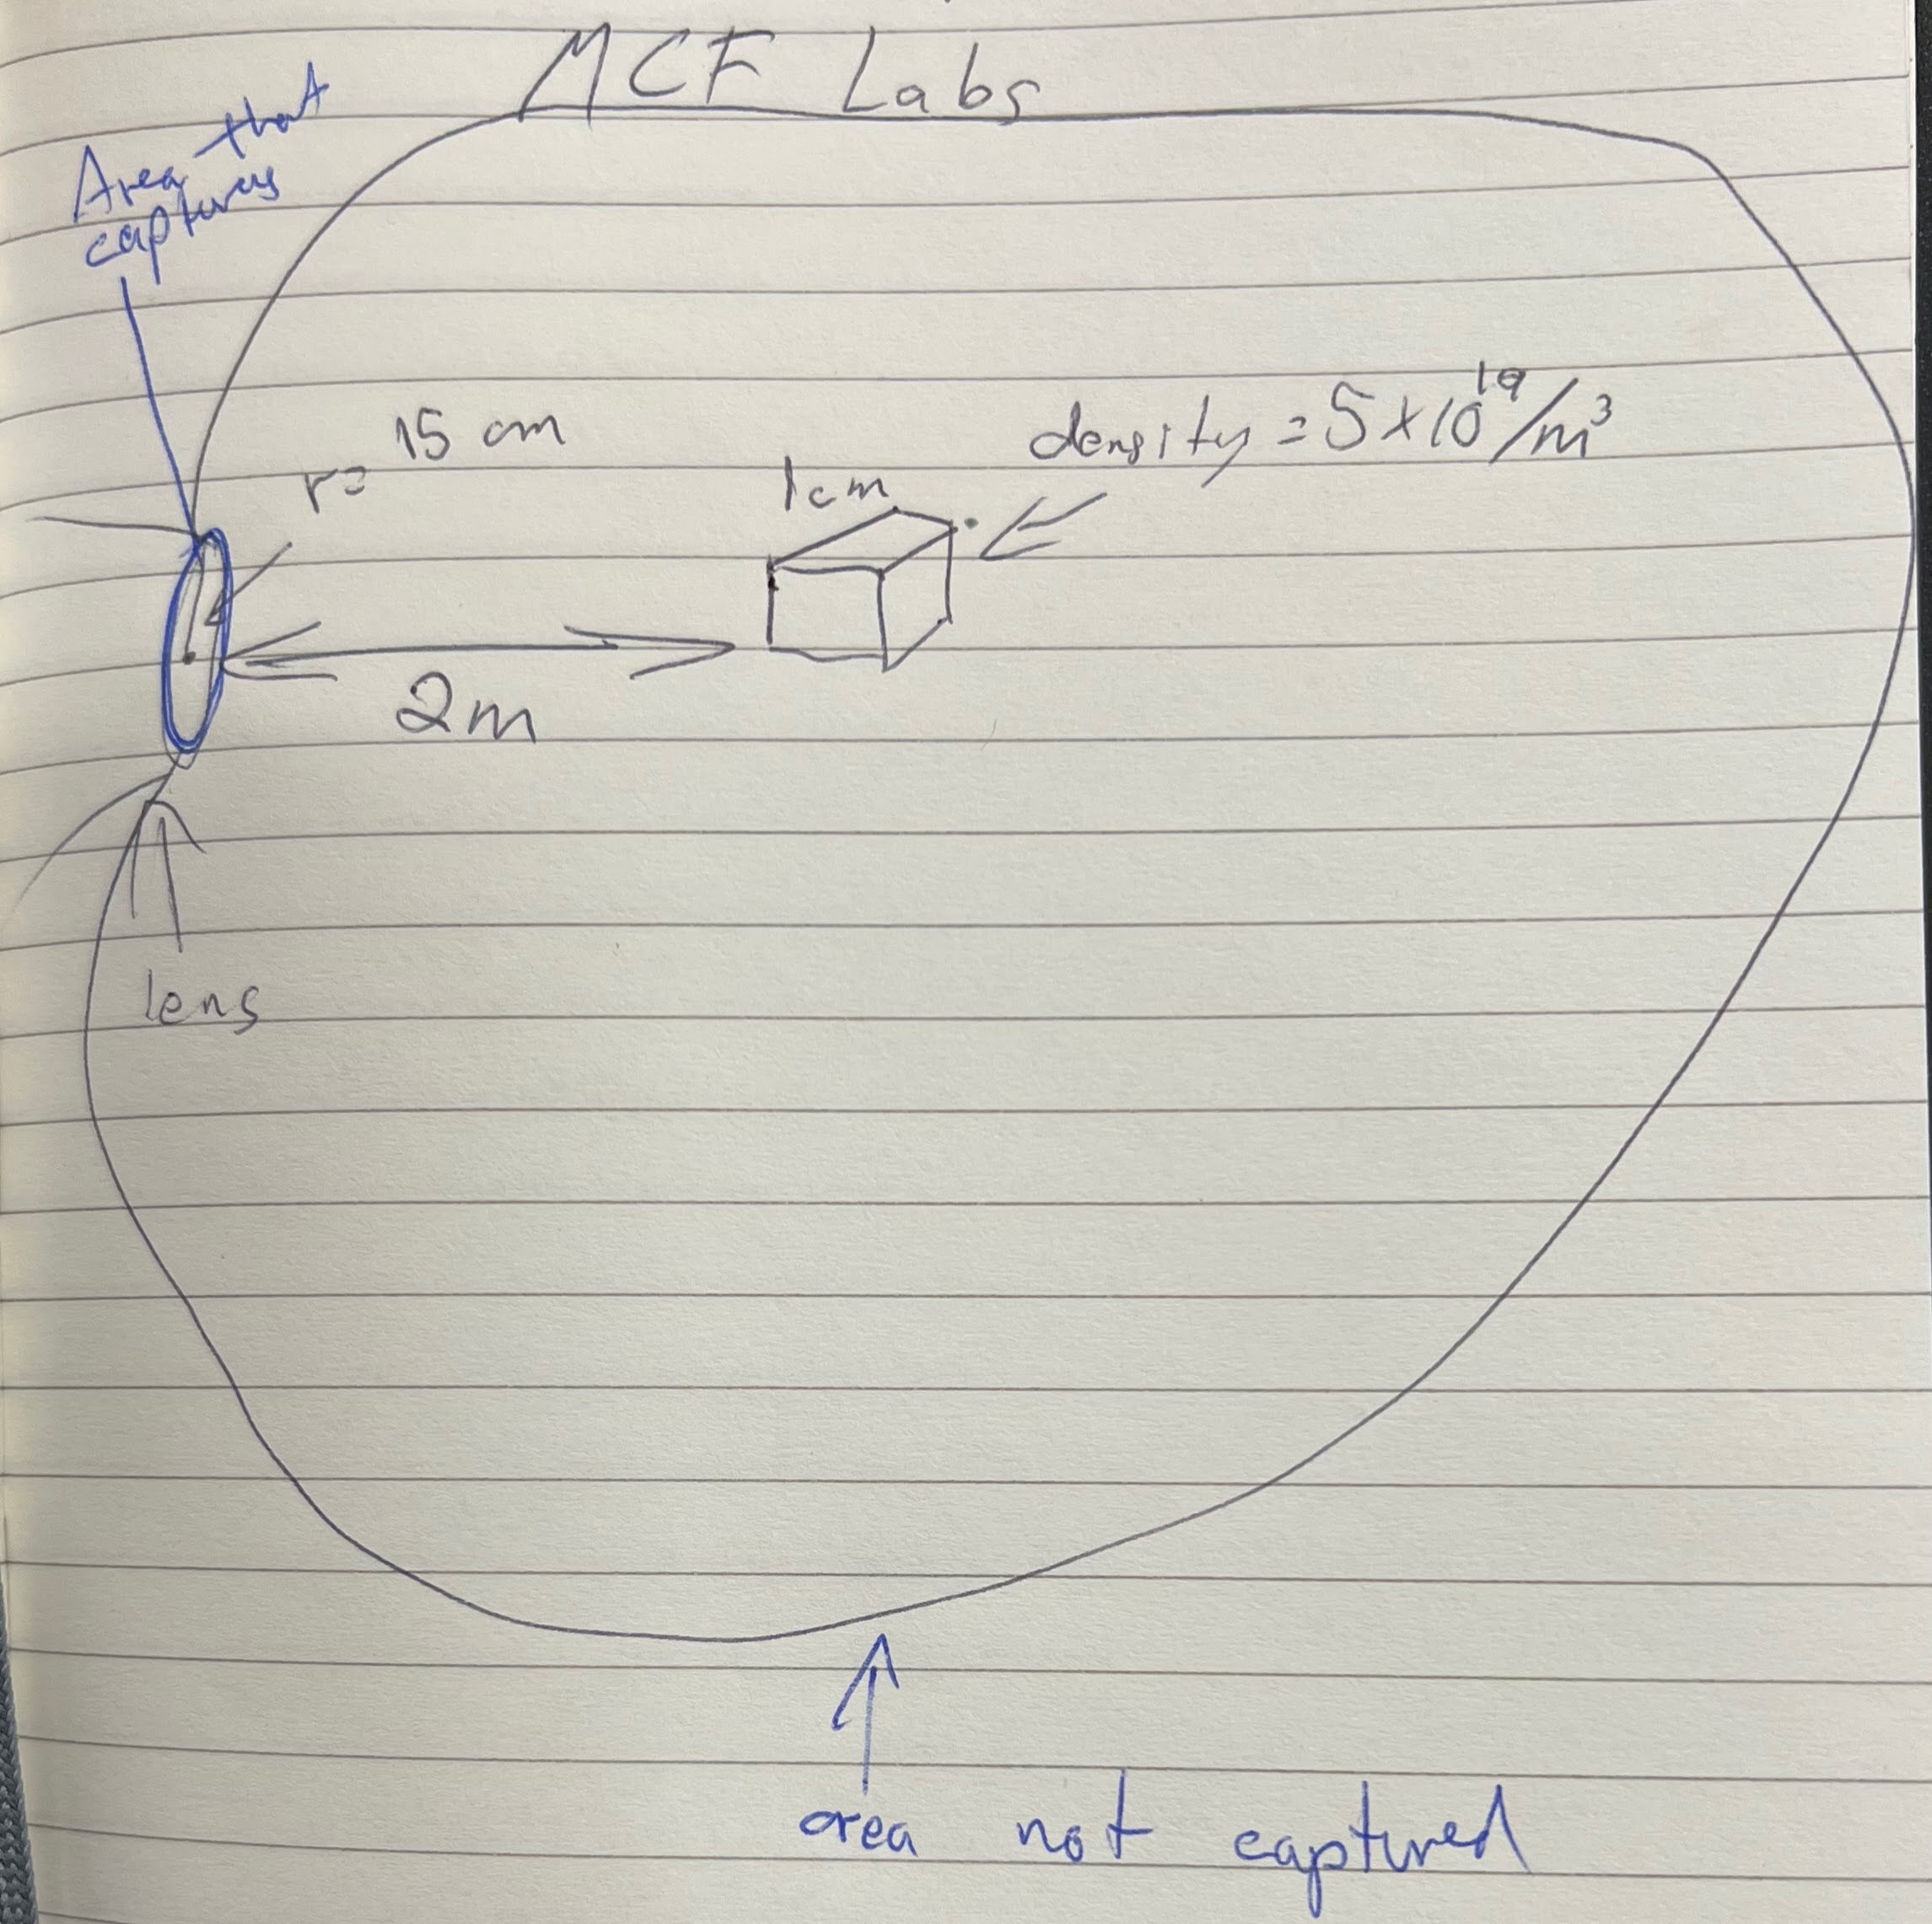

In [2]:
display.Image("./supporting_imgs/section_2_img_1.jpg")

In [3]:
lens_radius = 15 / 100 # meter
scattering_radius = 2 # meter

In [4]:
scattering_area = 4 * np.pi * scattering_radius**2
print ("The scattering area is: {} m^2".format(scattering_area))

The scattering area is: 50.26548245743669 m^2


In [5]:
lens_area = np.pi * lens_radius**2
print ("The lens area is: {} m^2".format(lens_area))

The lens area is: 0.07068583470577035 m^2


In [6]:
collected_photons_fraction = lens_area / scattering_area
print ("The collected photons fractions is: {}".format(collected_photons_fraction))

The collected photons fractions is: 0.00140625


Photons collected by the lens

In [7]:
planck_constant = 6.626e-34 # J*s
speed_of_light = 3e8 # meter / s
laser_wavelength = 694.3e-9 # meter
laser_energy_per_pulse = 10 # J

In [8]:
energy_per_photon = planck_constant * speed_of_light / laser_wavelength
print ("The energy per photon is: {}".format(energy_per_photon))#

The energy per photon is: 2.8630275097220224e-19


Now that we have the energy per photon, we can get the total number of photons

In [9]:
total_number_of_photons = laser_energy_per_pulse / energy_per_photon
print ("The total number of photons is: {}".format(total_number_of_photons))

The total number of photons is: 3.492806117315625e+19


Those are the photons that go through the plasma volume. Now, we have to find out how many of those photons interact with the plasma volume using the TS cross section, the plasma density, and the length of the plasma volume.

In [10]:
TS_cross_section = 6.65e-29 # meter^2
plasma_density = 5e19 # meter^-3
length = 0.01 # meter

In [11]:
photons_scattered = TS_cross_section * plasma_density * length * total_number_of_photons
print ("The amount of photons scattered are: {}".format(photons_scattered))

The amount of photons scattered are: 1161358034.0074453


In [12]:
photons_collected = collected_photons_fraction * photons_scattered
print ("The number of photons collected by the lens is: {}".format(photons_collected))

The number of photons collected by the lens is: 1633159.73532297


Section 3

In [13]:
intensity = np.loadtxt('../data_files/intensity.dat')	# 2D array of CCD counts data

In [14]:
print ("So, this data file is a 2D array with shape {}. How can we make sense of this data?".format(intensity.shape))

So, this data file is a 2D array with shape (284, 302). How can we make sense of this data?


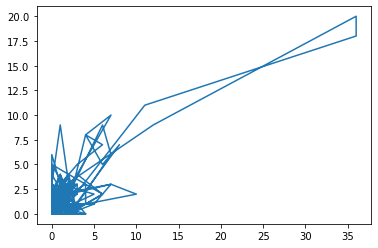

In [15]:
plt.plot(intensity[:, 0], intensity[:, 1])

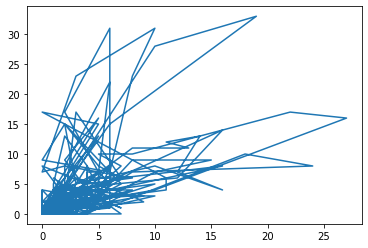

In [16]:
plt.plot(intensity[0, :], intensity[1, :])

Those looked pretty strange, so I will plot it as a colorplot.

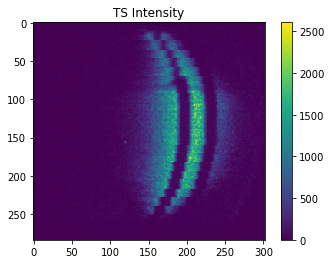

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("TS Intensity")
plt.imshow(intensity)
plt.colorbar(orientation="vertical")
plt.show()

This looked closer to what it is intended to represent. But, which axis is the spatial position and which one is the wavelength?

In [18]:
# rad_mesh = ""
# plt.pcolor(wavelength, rad_mesh, intensity)

After some thinking, I believe that this is not the wavelength, but the pixel location.

Text(0.5, 1.0, 'Spatial location 142')

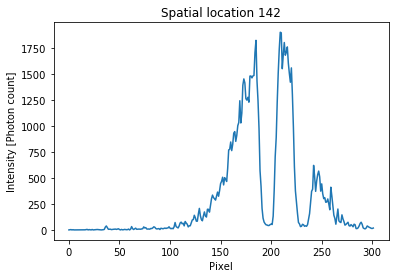

In [19]:
spatial_location_idx_center = int(intensity.shape[0] / 2)
spatial_location_idx = spatial_location_idx_center
plt.plot(intensity[spatial_location_idx])
plt.xlabel("Pixel")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

To change from pixels to wavelength. I'll use tha labmda.dat file to get that information.

In [20]:
wavelength = np.loadtxt('../data_files/lambda.dat')	# 2D array of CCD counts data

Text(0.5, 1.0, 'Spatial location 142')

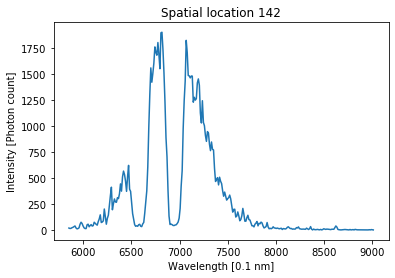

In [21]:
plt.plot(wavelength[spatial_location_idx], intensity[spatial_location_idx])
plt.xlabel("Wavelength [0.1 nm]")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

There are 2 wavelengths that are filtered out. These two wavelengths are the Balmer line and the laser. The Balmer line is one of the spectral line emissions from the hydrogen atom, and since the plasma species is made out of hydrogen, we have to account for that. The wavelengths for the Balmer line and the laser are going to be much higher than what we are measuring, so to avoid skewing the data, they were removed. This poses a new challenge since we have cropped data. This will be addressed later on.

Text(0.5, 1.0, 'Spatial location 142')

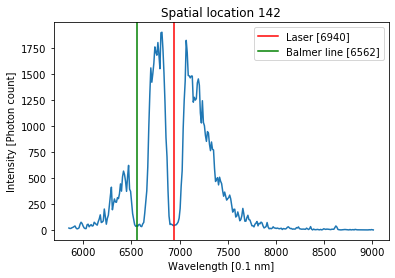

In [22]:
plt.plot(wavelength[spatial_location_idx], intensity[spatial_location_idx])
plt.axvline(6940, label="Laser [6940]", color="r")
plt.axvline(6562, label="Balmer line [6562]", color="g")
plt.legend(loc="best")
plt.xlabel("Wavelength [0.1 nm]")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

Section 4

To get the electron temperature, T_e, we first have to fit a Gaussian.

In [23]:
def gaussian(x, *params):
    A = params[0]
    x0 = params[1]
    c = params[2]
    # y0 = params[3]
    return A*np.exp(-(x-x0)**2 / (2*c**2))

In [24]:
xdata, ydata = wavelength[spatial_location_idx], intensity[spatial_location_idx]
guess = [1000,7000,100]
print("Our initial guess is: {}".format(guess))
popt, pcov = curve_fit(gaussian, xdata, ydata, p0=guess)
yfit = gaussian(xdata, *popt)
for i in range(len(popt)):
	print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
print("Fit parameters : ", popt)
print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))

Our initial guess is: [1000, 7000, 100]
Parameter 0 : 1066.335981865511 +/- 49.736674119270916
Parameter 1 : 7002.229673522936 +/- 19.499872229800808
Parameter 2 : 362.0664781462552 +/- 19.50619439181259
Fit parameters :  [1066.33598187 7002.22967352  362.06647815]
Fit standard deviations :  [49.73667412 19.49987223 19.50619439]


Text(0.5, 1.0, 'Spatial location 142')

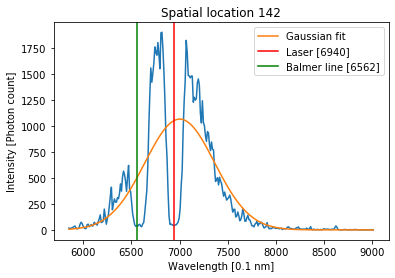

In [25]:
plt.plot(xdata, ydata)
plt.plot(xdata, yfit, label="Gaussian fit")
plt.axvline(6940, label="Laser [6940]", color="r")
plt.axvline(6562, label="Balmer line [6562]", color="g")
plt.legend(loc="best")
plt.xlabel("Wavelength [0.1 nm]")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

The Guassian is at least following the trend, but the problem is that I'm fitting data that is not real (the 2 omitted wavelengths). Now, I have to figure out how to manage this.

I'm going to try to fit a Gaussian, and then crop the data below the Gaussian. Then, I'll fit another Gaussian with the corrected data, and do the same process of cropping the data below the new Gaussian line. I'm not sure if it'll work, but it's worth the try. I'll stop the process by looking at the difference between the previouse and current Gaussian, and if the difference is below a threshold, I'll stop the process.

The idea behind is that, since we have cropped data, the Gaussian fit will always be below what we need. So, if for every data point, we get the maximum between the raw data and the Gaussian fitted data, we will get data that is closer to the truth.

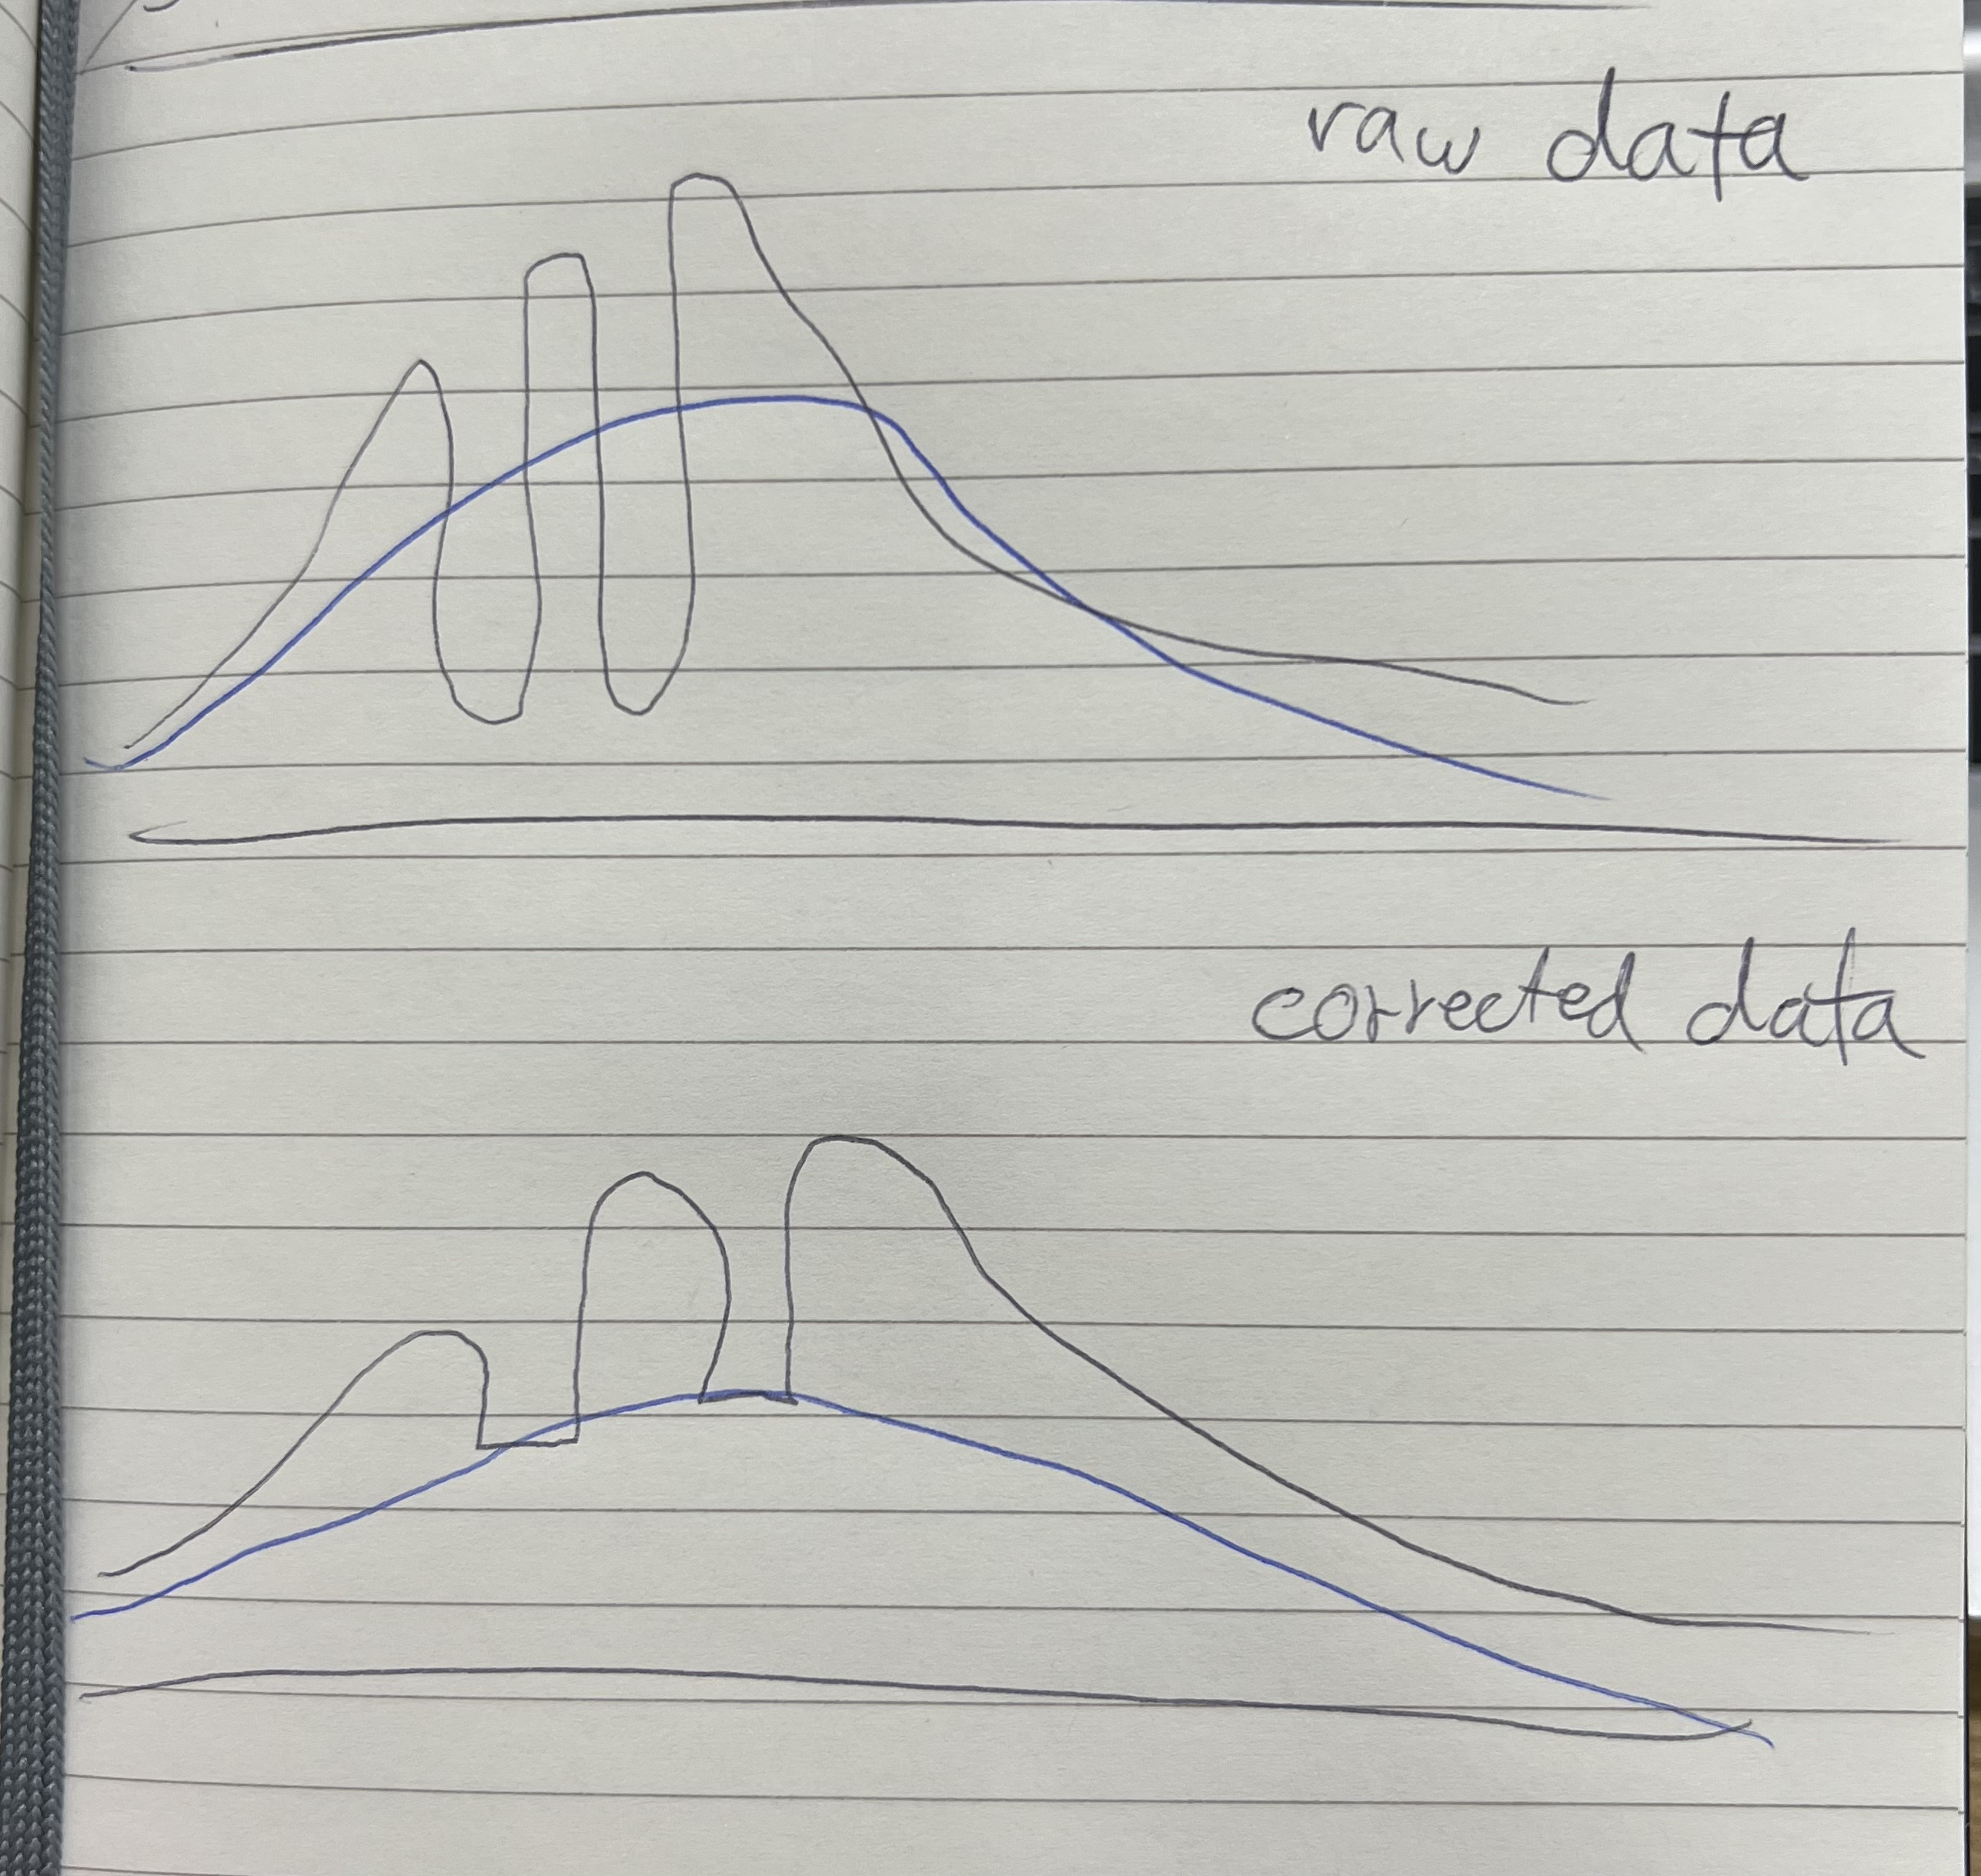

In [26]:
display.Image("./supporting_imgs/section_4_img_1.jpg")

In [27]:
data_before_correction = np.stack([yfit, ydata], axis=1)
y_corrected_data = np.amax(data_before_correction, axis=1)

Text(0.5, 1.0, 'Spatial location 142')

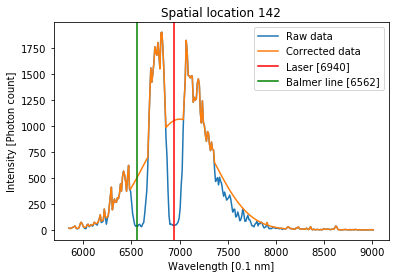

In [28]:
plt.plot(xdata, ydata, label="Raw data")
# plt.plot(xdata, yfit, label="Gaussian fit")
plt.plot(xdata, y_corrected_data, label="Corrected data")
plt.axvline(6940, label="Laser [6940]", color="r")
plt.axvline(6562, label="Balmer line [6562]", color="g")
plt.legend(loc="best")
plt.xlabel("Wavelength [0.1 nm]")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

The corrected data looks better than the raw data. Let's see how the Guassian fit works.

Our initial guess is: [1000, 7000, 100]
Parameter 0 : 1402.443049842505 +/- 25.477317957332332
Parameter 1 : 6966.575704852783 +/- 7.306483044957813
Parameter 2 : 348.3369964804944 +/- 7.308565393023998
Fit parameters :  [1402.44304984 6966.57570485  348.33699648]
Fit standard deviations :  [25.47731796  7.30648304  7.30856539]


Text(0.5, 1.0, 'Spatial location 142')

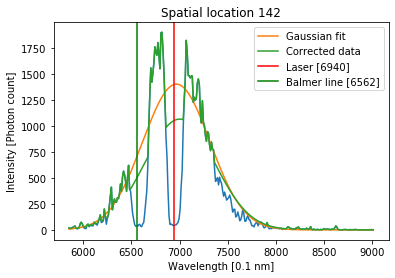

In [29]:
xdata, ydata = wavelength[spatial_location_idx], intensity[spatial_location_idx]
guess = [1000,7000,100]
print("Our initial guess is: {}".format(guess))
popt, pcov = curve_fit(gaussian, xdata, y_corrected_data, p0=guess)
yfit = gaussian(xdata, *popt)
for i in range(len(popt)):
	print ("Parameter",i,":",popt[i],"+/-",np.sqrt(pcov[i][i]))
print("Fit parameters : ", popt)
print("Fit standard deviations : ", np.sqrt(np.diag(pcov)))
plt.plot(xdata, ydata)
plt.plot(xdata, yfit, label="Gaussian fit")
plt.plot(xdata, y_corrected_data, label="Corrected data")
plt.axvline(6940, label="Laser [6940]", color="r")
plt.axvline(6562, label="Balmer line [6562]", color="g")
plt.legend(loc="best")
plt.xlabel("Wavelength [0.1 nm]")
plt.ylabel("Intensity [Photon count]")
plt.title("Spatial location {}".format(spatial_location_idx))

The new Gaussian fit looks much more closer to the truth. I'll put everything in a while loop and do this until the difference is not that big. I'll put it in a function so that I can reuse it later on. For the difference I'll use the parameter A, as that is the one that needs to get as close to the top as possible. That parameter is also easier to see if the Gaussian fit is doing a good job at fitting the data or not. I'll also put a limit of 10 Gaussian fits to avoid overdoing it. I don't think it's necessary, but it's good to have an extra safety limit.

In [30]:
def get_gaussian_fit(spatial_location_idx=spatial_location_idx_center, A_0=10, print_results=True):
    xdata, ydata = wavelength[spatial_location_idx], intensity[spatial_location_idx]
    y_data_for_fit = ydata
    A_previous = 1
    # below 10% difference, or if it runs more than 10 times, the while loop will stop
    i = 1
    while A_previous / A_0 <+ .9 and i < 11:
        i += 1 
        guess = [A_0,7000,1000]
        popt, pcov = curve_fit(gaussian, xdata, y_data_for_fit, p0=guess)
        yfit = gaussian(xdata, *popt)
        data_before_correction = np.stack([yfit, y_data_for_fit], axis=1)
        y_data_for_fit = np.amax(data_before_correction, axis=1)
        A_previous = A_0
        A_0 = popt[0]
    if print_results:
        print("The final parameters are: {}".format(popt))
        plt.plot(xdata, ydata)
        plt.plot(xdata, yfit, label="Final Gaussian fit")
        plt.plot(xdata, y_data_for_fit, label="Final corrected data")
        plt.axvline(6940, label="Laser [6940]", color="r")
        plt.axvline(6562, label="Balmer line [6562]", color="g")
        plt.legend(loc="best")
        plt.xlabel("Wavelength [0.1 nm]")
        plt.ylabel("Intensity [Photon count]")
        plt.title("Spatial location {}".format(spatial_location_idx))
    
    return popt, pcov

The final parameters are: [1675.94546979 6940.08260542  338.24543083]


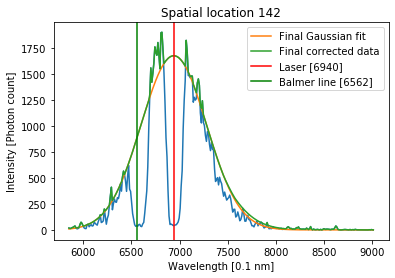

In [31]:
popt, pcov = get_gaussian_fit(spatial_location_idx)

This looks nice! I'll try with several other spatial locations to see how it looks like.

The final parameters are: [5.11757044e+00 6.46456628e+03 1.46053558e+03]


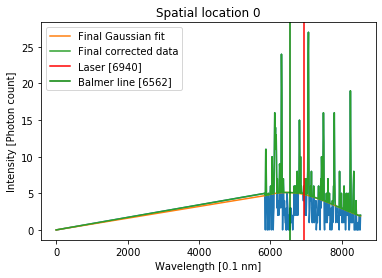

In [32]:
popt, pcov = get_gaussian_fit(0)

The final parameters are: [ 135.0657511  6997.27007365   90.40477438]


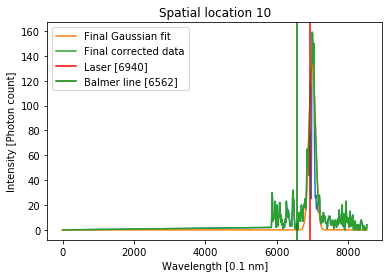

In [33]:
popt, pcov = get_gaussian_fit(10)

The final parameters are: [1605.40992411 6932.82201841  339.07166172]


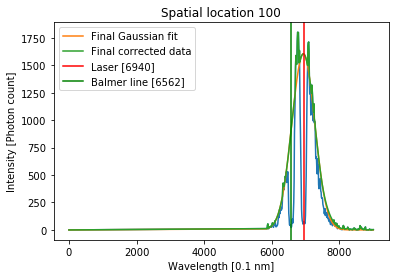

In [34]:
popt, pcov = get_gaussian_fit(100)

The final parameters are: [1451.40722321 6928.16861725  314.18305066]


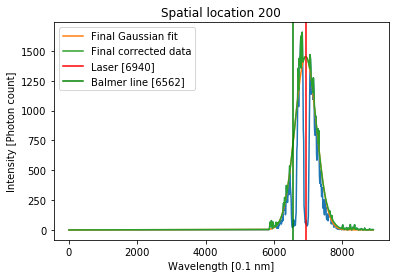

In [35]:
popt, pcov = get_gaussian_fit(200)

The final parameters are: [  24.15256912 5765.76819851 1716.43085633]


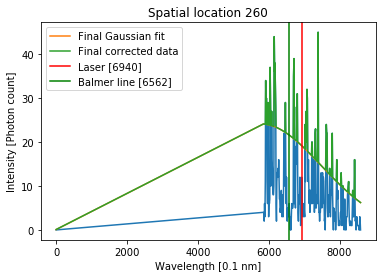

In [36]:
popt, pcov = get_gaussian_fit(260)

The final parameters are: [6.92915113e+00 6.95572160e+03 6.30907342e+02]


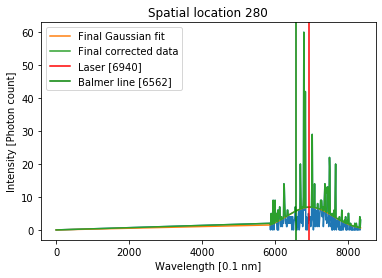

In [37]:
popt, pcov = get_gaussian_fit(280)

Looks like the function struggles with the limits (0, 283). I'll probably have to crop the data in those cases, because there's too much noise.

In terms of the initial condition (A_0 parameter), I tried with several values, and what's needed for this to work with edge cases (e.g. spatial index = 10, 250) is to have a small enough A_0 parameter. That will ensure that the function is not stopped before reaching and acceptable fit. This doesn't solve the very extreme values (e.g. spatial index = 0, over 250).

Now, unto the electron temperature T_e.

LAB 2 - 03/03/2022

Section 4

In [38]:
boltzmann_constant = 1.380649e-23 # m2 kg s-2 K-1
lambda_i = 6943 # 0.1 nm
electron_energy = 0.511 * 1000000 # eV

In [39]:
angles = np.loadtxt('../data_files/angle.dat') # 1D array of scattering angles
angles.shape

(284,)

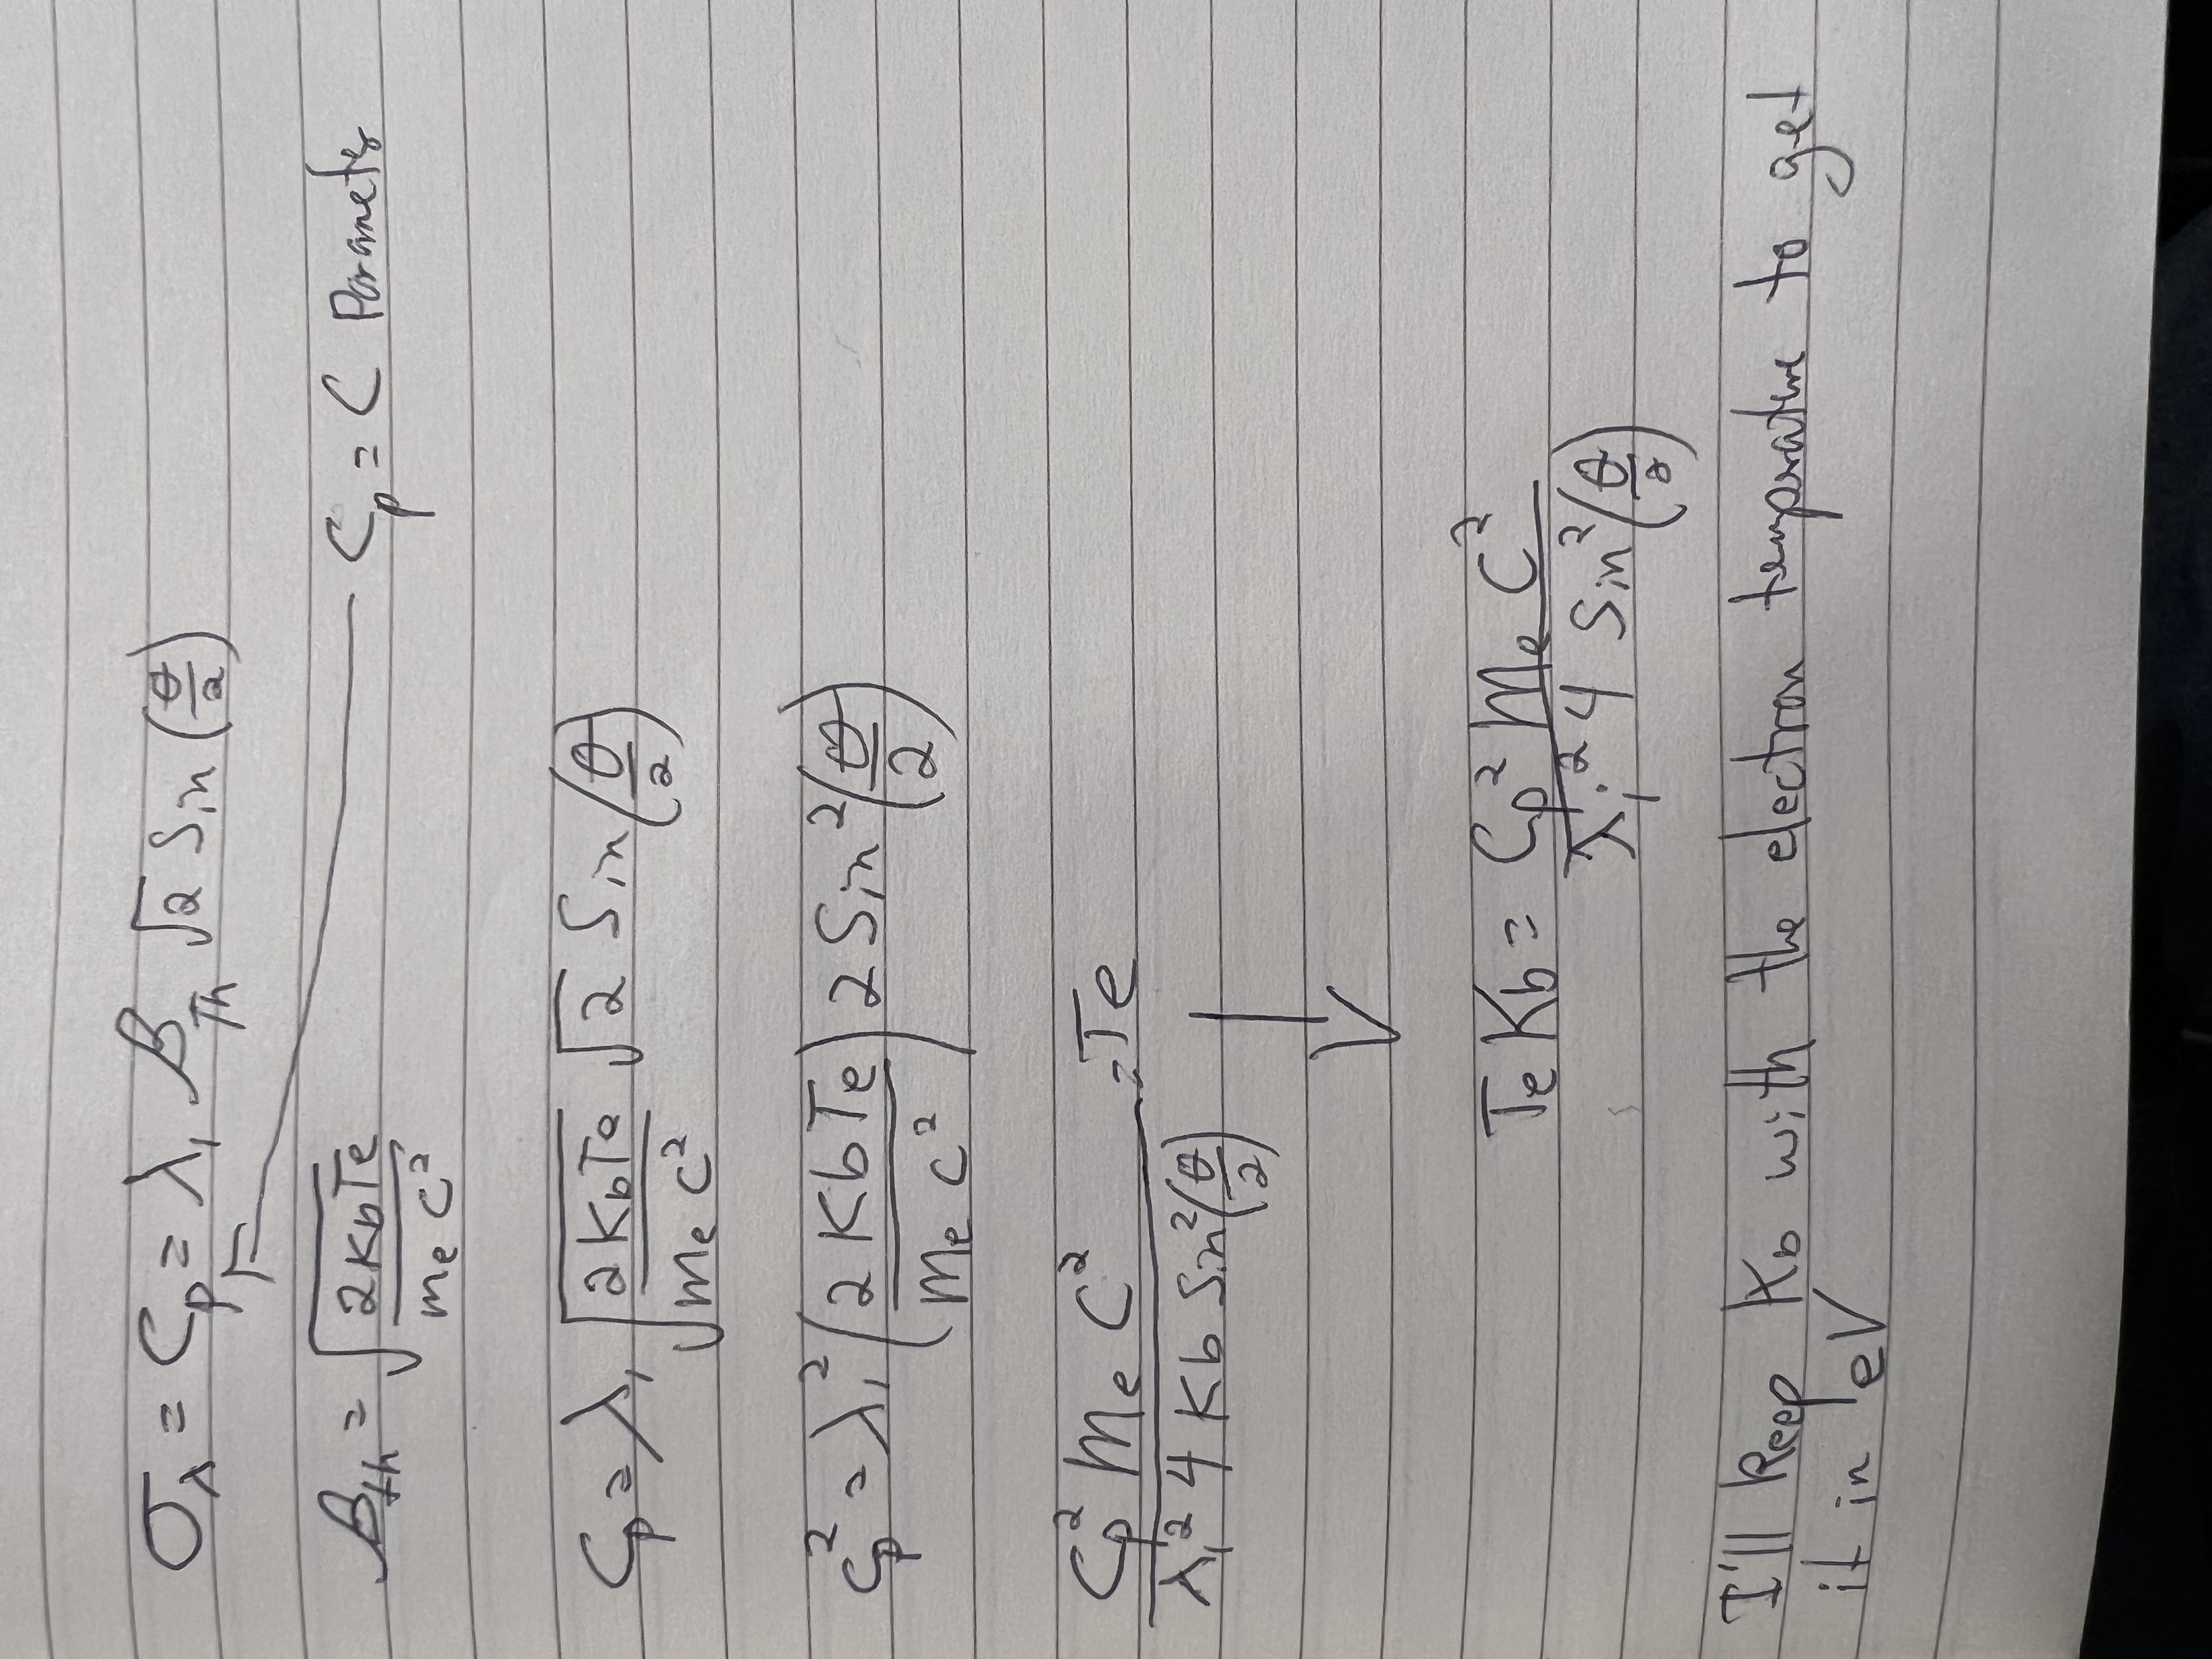

In [40]:
display.Image("./supporting_imgs/section_4_img_2.jpg")

I solved for T_e in the given equation. I'm assuming sigma_lambda to be the same as the C parameter that we are getting from the Gaussian fit.

In [41]:
def get_electron_temperature(spatial_location_idx=spatial_location_idx_center, print_results=True):
    popt, pcov = get_gaussian_fit(spatial_location_idx, print_results=print_results)
    C = popt[2] # what are the units?
    angle = angles[spatial_location_idx]
    T_e = (C**2 * electron_energy) / (lambda_i**2 * 4 * np.sin(angle/2)**2)
    if print_results:
        print ("The electron energy for location {} is: {} ev".format(spatial_location_idx,T_e))
    return T_e # eV

The final parameters are: [1675.94546979 6940.08260542  338.24543083]
The electron energy for location 142 is: 548.5627637512292 ev


548.5627637512292

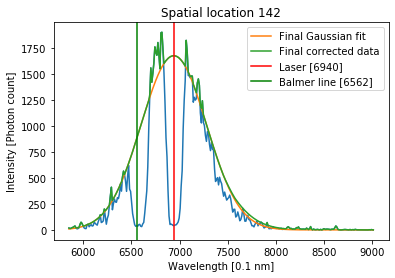

In [42]:
get_electron_temperature(spatial_location_idx_center)

Now that we have a function that can get the electron temperature given a spatial location index, I'll look through all of the data to see what I get.

In [43]:
radius = np.loadtxt('../data_files/radius.dat') # 1D array of major radii

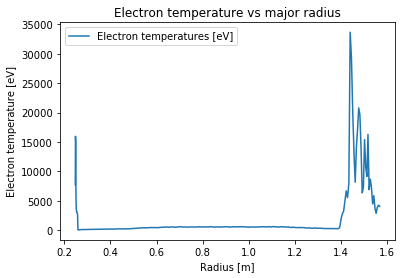

In [44]:
spatial_locations = range(wavelength.shape[0])
electron_temperatures = [get_electron_temperature(spatial_location, print_results=False) for spatial_location in spatial_locations]
plt.plot(radius[spatial_locations], electron_temperatures, label="Electron temperatures [eV]")
plt.legend(loc="upper left")
plt.title("Electron temperature vs major radius")
plt.xlabel("Radius [m]")
plt.ylabel("Electron temperature [eV]")
plt.show()

That looks weird. Going back to when we tested multiple locations on the Gaussian fit, we could see that for the extreme values of spatial_location_idx = 0 and over 250, the Gaussian fit didn't work very well. So, it makes sense that in this graph, the results don't make a lot of sense. I'll crop the data to remove the noise present in the extreme values.

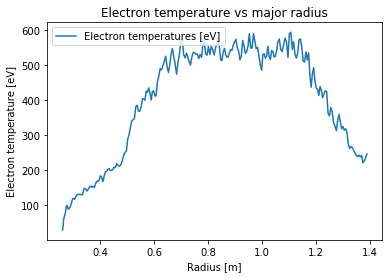

In [45]:
# New range without the peaks
spatial_locations = range(10, 250)
electron_temperatures = [get_electron_temperature(spatial_location, print_results=False) for spatial_location in spatial_locations]
plt.plot(radius[spatial_locations], electron_temperatures, label="Electron temperatures [eV]")
plt.legend(loc="upper left")
plt.title("Electron temperature vs major radius")
plt.xlabel("Radius [m]")
plt.ylabel("Electron temperature [eV]")
plt.show()

This makes a lot more sense. Now, I need to add the uncertanties. So far, we only have the uncertanties from the Gaussian fit. I'll start with those.

In [46]:
def get_electron_temperature_with_uncertainty(spatial_location_idx=spatial_location_idx_center, print_results=True):
    popt, pcov = get_gaussian_fit(spatial_location_idx, print_results=print_results)
    C = popt[2]
    C_error = np.sqrt(pcov[2][2])
    C_error_pct = C_error / C
    # print ("C_error_pct: {}".format(C_error_pct))
    angle = angles[spatial_location_idx]
    T_e = (C**2 * electron_energy) / (lambda_i**2 * 4 * np.sin(angle/2)**2)
    # add the radius significant figures to the error bars
    # times 2 because of the C**2.
    T_e_error = T_e * C_error_pct * 2
    if print_results:
        print ("The electron energy for location {} is: {} += {} ev".format(spatial_location_idx, T_e, T_e_error))
    return T_e, T_e_error # eV

The final parameters are: [1675.94546979 6940.08260542  338.24543083]
The electron energy for location 142 is: 548.5627637512292 += 8.359963398938485 ev


(548.5627637512292, 8.359963398938485)

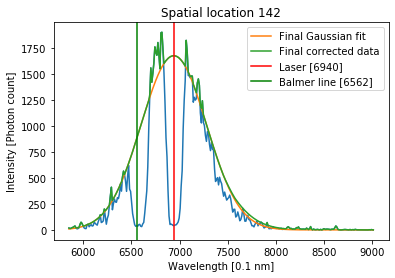

In [47]:
get_electron_temperature_with_uncertainty()

In [48]:
electron_temperature_obj = np.array([get_electron_temperature_with_uncertainty(spatial_location, print_results=False) for spatial_location in spatial_locations])

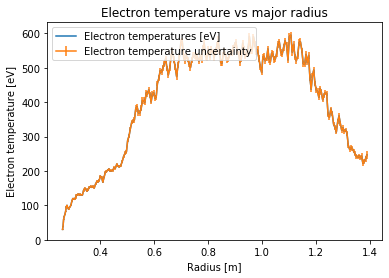

In [49]:
plt.plot(radius[spatial_locations], electron_temperature_obj[:,0], label="Electron temperatures [eV]")
plt.errorbar(radius[spatial_locations], electron_temperature_obj[:,0], yerr=electron_temperature_obj[:,1], label="Electron temperature uncertainty")
plt.legend(loc="upper left")
plt.title("Electron temperature vs major radius")
plt.xlabel("Radius [m]")
plt.ylabel("Electron temperature [eV]")
plt.show()

We have too many data points, so it looks like a new graph on top of it. I'll try with plotting another 2 plots, the first one with the T_e + error, and the other one with T_e - error.

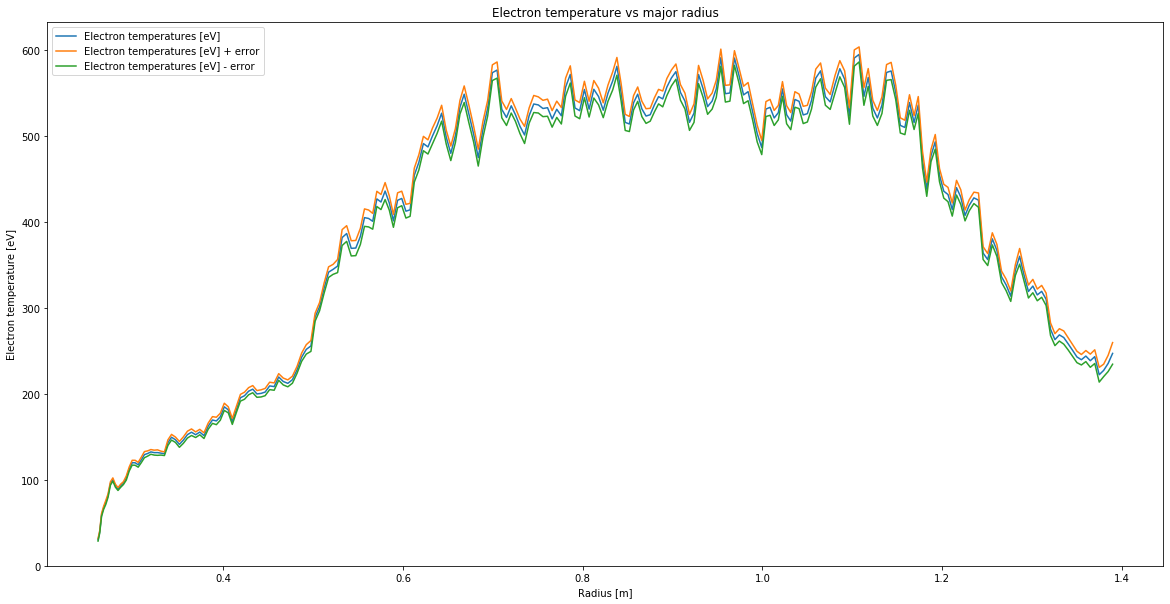

In [50]:
# To have a bigger graph
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(radius[spatial_locations], electron_temperature_obj[:,0], label="Electron temperatures [eV]")
plt.plot(radius[spatial_locations], electron_temperature_obj[:,0] + electron_temperature_obj[:,1], label="Electron temperatures [eV] + error")
plt.plot(radius[spatial_locations], electron_temperature_obj[:,0] - electron_temperature_obj[:,1], label="Electron temperatures [eV] - error")
plt.legend(loc="upper left")
plt.title("Electron temperature vs major radius")
plt.xlabel("Radius [m]")
plt.ylabel("Electron temperature [eV]")
plt.show()

Conclusions

- Looking at the data and at the results from this whole analysis, it makes sense that the electron temperature is higher the closer it gets to the center of the plasma. It should also go close to 0 at the end of the tokamak (Outside of the graph, radius > 1.4), but there's too much noise in those measurements to make a proper analysis.
- Another interesting thing is that the slope when the radius is big is steeper than the slope when the radius is small. This is because of the density gradient. The density gradient is going to be bigger at the outward edge of the plasma than at the inward edge of the plasma.
- The uncertainties get bigger in the higher temperatures. That's probably because it gets harder to measure high temperatures. Probably there are other effects (such as the relativistic effects suggested in the extension section). I haven't analysed that, so I can't say that relativistic effects have anything to do right now at < 1 kev, but it is worth considering. 
- So far, we are only considering the uncertainty that comes from the Gaussian fit. We are still missing the uncertainties associated with the instrument and the angles at which the photon reach the lens.